In [39]:
import lhapdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from Results import *


# Global Constants
M1_test=np.sqrt(0.8)
Kp2A=0.57
Pp2A=0.12

ee=1
eU=2/3
eUbar=-2/3
eD=-1/3
eDbar=1/3
eS=-1/3
eSbar=1/3

AlphaU_test=1.0
BetaU_test=6.6
AlphaD_test=1.9
BetaD_test=10
AlphaS_test=0
BetaS_test=0

NU_test=0.18
NUbar_test=-0.01
ND_test=-0.52
NDbar_test=-0.06
NS_test=0
NSbar_test=0

M1_t2 = 1.303

AlphaU_t2=0.645
BetaU_t2=3.122
AlphaD_t2=1.777
BetaD_t2=7.788
AlphaS_t2=6.84*10**(-5)
BetaS_t2=5.987*10**(-10)

NU_t2=0.169
NUbar_t2=0.007
ND_t2=-0.434
NDbar_t2=-0.142
NS_t2=0.563
NSbar_t2=-0.122

# Here the data sets are listed and collected into and Array called "DataFilesArray"
Dat1='Data/HERMES_p_2009.csv'
Dat2='Data/HERMES_p_2020.csv'
Dat3='Data/COMPASS_d_2009.csv'
Dat4='Data/COMPASS_p_2015.csv'
#Change Dataset here
DataFilesArray=[Dat2]
#PDFdataset = lhapdf.mkPDF("JAM19PDF_proton_nlo")
PDFdataset = lhapdf.mkPDF("cteq61")
FF_PiP_dataset=["NNFF10_PIp_nlo"]
FF_PiM_dataset=["NNFF10_PIm_nlo"]
FF_Pi0_dataset=["NNFF10_PIsum_nlo"]
FF_KP_dataset=["NNFF10_KAp_nlo"]
FF_KM_dataset=["NNFF10_KAm_nlo"]

# if DataFilesArray==[Dat1]:
#     filename="Hermes 2009"
#     result=result_H09
#     result_cov=result_cov_H09
# if DataFilesArray==[Dat2]:
#     filename="Hermes 2020"
#     result=result_H20
#     result_cov=result_cov_H20
# if DataFilesArray==[Dat3]:
#     filename="Compass 2009"
#     result=result_C09
#     result_cov=result_cov_C09
# if DataFilesArray==[Dat4]:
#     filename="Compass 2015"
#     result=result_C15
#     result_cov=result_cov_C15
    
#If plotting multiple files, manually set 'filename'='whatever name you want'
#Also set 'result' and 'result_cov' to the result and result_cov of a group fit with multiple datasets

# result=np.array([3.300,0.406,2.114,10.104,-0.068,-1.730,1.7991,2.72,-0.602,3.74,0.313,1.9e-03,0.80])
# result_cov=np.array([0.023,0.005,0.034,0.010,0.004,0.014,0.0030,0.04,0.012,0.09,0.007,0.5e-3,0.08])

# result=np.array([3.77,0.442,2.08,10.25,-0.063,-1.738,1.683,3.35,-0.31,3.787,0.310,2.4e-3,0.30])
# result_cov=np.array([0.13,0.007,0.04,0.05,0.007,0.025,0.027,0.21,0.01,0.0355,0.016,0.5e-3,0.18])

# result=np.array([4.09,0.4503,1.983,10.49,-0.075,-1.75,1.647,3.16,-0.590,3.81,0.267,1.8e-3,0.38])
# result_cov=np.array([0.13,0.0028,0.031,0.05,0.009,0.04,0.013,0.12,0.006,0.05,0.014,0.4e-3,0.25])


np.ravel(result)
np.ravel(result_cov)

#filename="Hermes 2009,2020 & Compass 2009.2015"
datapoints=145

In [40]:
def hadarray(filename):
    tempdf=pd.read_csv(filename)
    temphad_data=tempdf["hadron"]
    temphad=temphad_data.dropna().unique()
    refined_had_array=[]
    for i in range(0,len(temphad)):
        if((temphad[i]=="pi+") or (temphad[i]=="pi-") or (temphad[i]=="pi0") or (temphad[i]=="k+") or (temphad[i]=="k-")):
            refined_had_array.append(temphad[i])
    return refined_had_array

def dataslice(filename,Had,Var):
    tempdf=pd.read_csv(filename)
    temp_slice=tempdf[(tempdf["hadron"]==Had)&(tempdf["1D_dependence"]==Var)]
    tempQ2=np.array(temp_slice["Q2"])
    tempX=np.array(temp_slice["x"])
    tempZ=np.array(temp_slice["z"])
    tempPHT=np.array(temp_slice["phT"])
    tempSiv=np.array(temp_slice["Siv"])
    temperrSiv=np.array(temp_slice["tot_err"])
    return tempQ2,tempX,tempZ,tempPHT,tempSiv,temperrSiv

def ks2Avg(m1,kperp2Avg):
    test_ks2Avg=((m1**2)*kperp2Avg)/((m1**2)+kperp2Avg)
    return test_ks2Avg

def A0(z,pht,m1,kperp2Avg,pperp2Avg,eCharg):
    tempA0part1=(((z**2)*kperp2Avg+pperp2Avg)*((ks2Avg(m1,kperp2Avg))**2))/((((z**2)*(ks2Avg(m1,kperp2Avg))+pperp2Avg)**2)*kperp2Avg)
    tempA0part21=(pht**2)*(z**2)*(ks2Avg(m1,kperp2Avg) - kperp2Avg)
    tempA0part22=((z**2)*(ks2Avg(m1,kperp2Avg))+pperp2Avg)*((z**2)*kperp2Avg+pperp2Avg)
    tempA0part2=np.exp(-tempA0part21/tempA0part22)
    tempA0part3=(np.sqrt(2*eCharg))*z*pht/m1
    tempA0=tempA0part1*tempA0part2*tempA0part3
    return tempA0

#def NNq(x,Nq,aq,bq):
#    tempNNq = Nq*(x**aq)*((1-x)**(bq))*((aq+bq)**(aq+bq))/((aq**aq)*(bq**bq))
#    return np.abs(tempNNq)

def NNq(x,Nq,aq,bq):
    aaq=abs(aq)
    bbq=abs(bq)
    tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
    return np.abs(tempNNq, dtype=object)


def NNqbar(x,Nqbar):
    tempNNqbar = Nqbar
    return tempNNqbar

def xFxQ2(dataset,flavor,x,QQ):
    temp_parton_dist_x=np.array(dataset.xfxQ2(flavor, x, QQ))
    return temp_parton_dist_x

def zFzQ(dataset,flavor,zz,QQ):
    # Here "0" represents the central values from the girds
    temp_zD1=lhapdf.mkPDF(dataset[0], 0)
    zD1_vec=np.array(temp_zD1.xfxQ2(flavor,zz,QQ))
    return zD1_vec


def Asymmetry(QQ,x,z,pht,m1,Nu,au,bu,Nubar,Nd,ad,bd,Ndbar,Ns,aS,bs,Nsbar,lhaqID,lhaqbarID):
    kperp2Avg=Kp2A
    pperpAvg=Pp2A
    eCharg=ee
    if((lhaqID==2)and(lhaqbarID==-1)):
        ### This is pi+
        uCont1= NNq(x,Nu,au,bu)*(eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_PiP_dataset,2,z,QQ)
        ubarCont1= NNqbar(x,Nubar)*(eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_PiP_dataset,-2,z,QQ)
        dCont1= NNq(x,Nd,ad,bd)*(eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_PiP_dataset,1,z,QQ)
        dbarCont1= NNqbar(x,Ndbar)*(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_PiP_dataset,-1,z,QQ)
        sCont1= NNq(x,Ns,aS,bs)*(eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_PiP_dataset,3,z,QQ)
        sbarCont1= NNqbar(x,Nsbar)*(eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_PiP_dataset,-3,z,QQ)
        uCont2= (eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_PiP_dataset,2,z,QQ)
        ubarCont2= (eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_PiP_dataset,-2,z,QQ)
        dCont2= (eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_PiP_dataset,1,z,QQ)
        dbarCont2=(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_PiP_dataset,-1,z,QQ)
        sCont2= (eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_PiP_dataset,3,z,QQ)
        sbarCont2= (eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_PiP_dataset,-3,z,QQ)
        tempNumerator = uCont1 + ubarCont1 +dCont1 + dbarCont1 + sCont1 + sbarCont1
        tempDenominator = uCont2 + ubarCont2 +dCont2 + dbarCont2 + sCont2 + sbarCont2
        tempASiv = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*(tempNumerator/tempDenominator)
    elif((lhaqID==1)and(lhaqbarID==-2)):
        ### This is pi-
        uCont1= NNq(x,Nu,au,bu)*(eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_PiM_dataset,2,z,QQ)
        ubarCont1= NNqbar(x,Nubar)*(eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_PiM_dataset,-2,z,QQ)
        dCont1= NNq(x,Nd,ad,bd)*(eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_PiM_dataset,1,z,QQ)
        dbarCont1= NNqbar(x,Ndbar)*(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_PiM_dataset,-1,z,QQ)
        sCont1= NNq(x,Ns,aS,bs)*(eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_PiM_dataset,3,z,QQ)
        sbarCont1= NNqbar(x,Nsbar)*(eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_PiM_dataset,-3,z,QQ)
        uCont2= (eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_PiM_dataset,2,z,QQ)
        ubarCont2= (eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_PiM_dataset,-2,z,QQ)
        dCont2= (eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_PiM_dataset,1,z,QQ)
        dbarCont2= (eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_PiM_dataset,-1,z,QQ)
        sCont2= (eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_PiM_dataset,3,z,QQ)
        sbarCont2= (eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_PiM_dataset,-3,z,QQ)
        tempNumerator = uCont1 + ubarCont1 +dCont1 + dbarCont1 + sCont1 + sbarCont1
        tempDenominator = uCont2 + ubarCont2 +dCont2 + dbarCont2 + sCont2 + sbarCont2
        tempASiv = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*(tempNumerator/tempDenominator)
    elif((lhaqID==1)and(lhaqbarID==-1)):
        ### This is pi0
        uCont1= NNq(x,Nu,au,bu)*(eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_Pi0_dataset,2,z,QQ)
        ubarCont1= NNqbar(x,Nubar)*(eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_Pi0_dataset,-2,z,QQ)
        dCont1= NNq(x,Nd,ad,bd)*(eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_Pi0_dataset,1,z,QQ)
        dbarCont1= NNqbar(x,Ndbar)*(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_Pi0_dataset,-1,z,QQ)
        sCont1= NNq(x,Ns,aS,bs)*(eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_Pi0_dataset,3,z,QQ)
        sbarCont1= NNqbar(x,Nsbar)*(eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_Pi0_dataset,-3,z,QQ)
        uCont2= (eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_Pi0_dataset,2,z,QQ)
        ubarCont2= (eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_Pi0_dataset,-2,z,QQ)
        dCont2= (eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_Pi0_dataset,1,z,QQ)
        dbarCont2= (eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_Pi0_dataset,-1,z,QQ)
        sCont2= (eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_Pi0_dataset,3,z,QQ)
        sbarCont2= (eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_Pi0_dataset,-3,z,QQ)
        tempNumerator = uCont1 + ubarCont1 +dCont1 + dbarCont1 + sCont1 + sbarCont1
        tempDenominator = uCont2 + ubarCont2 +dCont2 + dbarCont2 + sCont2 + sbarCont2
        tempASiv = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*(tempNumerator/tempDenominator)
    elif((lhaqID==2)and(lhaqbarID==-3)):
        ### This is k+
        uCont1= NNq(x,Nu,au,bu)*(eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_KP_dataset,2,z,QQ)
        ubarCont1= NNqbar(x,Nubar)*(eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_KP_dataset,-2,z,QQ)
        dCont1= NNq(x,Nd,ad,bd)*(eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_KP_dataset,1,z,QQ)
        dbarCont1= NNqbar(x,Ndbar)*(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_KP_dataset,-1,z,QQ)
        sCont1= NNq(x,Ns,aS,bs)*(eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_KP_dataset,3,z,QQ)
        sbarCont1= NNqbar(x,Nsbar)*(eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_KP_dataset,-3,z,QQ)
        uCont2= (eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_KP_dataset,2,z,QQ)
        ubarCont2= (eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_KP_dataset,-2,z,QQ)
        dCont2= (eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_KP_dataset,1,z,QQ)
        dbarCont2= (eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_KP_dataset,-1,z,QQ)
        sCont2= (eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_KP_dataset,3,z,QQ)
        sbarCont2= (eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_KP_dataset,-3,z,QQ)
        tempNumerator = uCont1 + ubarCont1 +dCont1 + dbarCont1 + sCont1 + sbarCont1
        tempDenominator = uCont2 + ubarCont2 +dCont2 + dbarCont2 + sCont2 + sbarCont2
        tempASiv = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*(tempNumerator/tempDenominator)
    elif((lhaqID==3)and(lhaqbarID==-2)):
        ### This is k+
        uCont1= NNq(x,Nu,au,bu)*(eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_KM_dataset,2,z,QQ)
        ubarCont1= NNqbar(x,Nubar)*(eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_KM_dataset,-2,z,QQ)
        dCont1= NNq(x,Nd,ad,bd)*(eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_KM_dataset,1,z,QQ)
        dbarCont1= NNqbar(x,Ndbar)*(eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_KM_dataset,-1,z,QQ)
        sCont1= NNq(x,Ns,aS,bs)*(eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_KM_dataset,3,z,QQ)
        sbarCont1= NNqbar(x,Nsbar)*(eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_KM_dataset,-3,z,QQ)
        uCont2= (eU**2)*xFxQ2(PDFdataset,2,x,QQ)*zFzQ(FF_KM_dataset,2,z,QQ)
        ubarCont2= (eUbar**2)*xFxQ2(PDFdataset,-2,x,QQ)*zFzQ(FF_KM_dataset,-2,z,QQ)
        dCont2= (eD**2)*xFxQ2(PDFdataset,1,x,QQ)*zFzQ(FF_KM_dataset,1,z,QQ)
        dbarCont2= (eDbar**2)*xFxQ2(PDFdataset,-1,x,QQ)*zFzQ(FF_KM_dataset,-1,z,QQ)
        sCont2= (eS**2)*xFxQ2(PDFdataset,3,x,QQ)*zFzQ(FF_KM_dataset,3,z,QQ)
        sbarCont2= (eSbar**2)*xFxQ2(PDFdataset,-3,x,QQ)*zFzQ(FF_KM_dataset,-3,z,QQ)
        tempNumerator = uCont1 + ubarCont1 +dCont1 + dbarCont1 + sCont1 + sbarCont1
        tempDenominator = uCont2 + ubarCont2 +dCont2 + dbarCont2 + sCont2 + sbarCont2
        tempASiv = A0(z,pht,m1,kperp2Avg,pperpAvg,eCharg)*(tempNumerator/tempDenominator)
    return tempASiv

In [41]:
## ** two stars represents a dictionary
def ASivFitHadron(hadron,KV,**parms):
    m1= parms["m1"]
    Nu = parms["Nu"]
    alphau= parms["alphau"]
    betau = parms["betau"]
    Nubar = parms["Nubar"]
    Nd = parms["Nd"]
    alphad= parms["alphad"]
    betad = parms["betad"]
    Ndbar = parms["Ndbar"]
    Ns = parms["Ns"]
    alphas= parms["alphas"]
    betas = parms["betas"]
    Nsbar = parms["Nsbar"]
    if(hadron=="pi+"):
        Qflag=2
        AniQflag=-1
    elif(hadron=="pi-"):
        Qflag=1
        AniQflag=-2
    elif(hadron=="pi0"):
        Qflag=1
        AniQflag=-1
    elif(hadron=="k+"):
        Qflag=2
        AniQflag=-3
    elif(hadron=="k-"):
        Qflag=3
        AniQflag=-2
    ################
    QQ,x,z,pht=KV
    array_size=len(x)
    tempASivHad_val=[]
    for i in range(0,array_size):
        tempASivHad=Asymmetry(QQ[i],x[i],z[i],pht[i],m1,Nu,alphau,betau,Nubar,Nd,alphad,betad,Ndbar,Ns,alphas,betas,Nsbar,Qflag,AniQflag)       
        tempASivHad_val.append(tempASivHad)
    return tempASivHad_val


In [42]:
def Kin_hadron(datfile,hadron):
    tempXfile=dataslice(datfile,hadron,"x")
    tempZfile=dataslice(datfile,hadron,"z")
    tempPhTfile=dataslice(datfile,hadron,"phT")
    ##### Q2 ################
    tempQ2_x=np.array(tempXfile[0])
    tempQ2_z=np.array(tempZfile[0])
    tempQ2_phT=np.array(tempPhTfile[0])
    tempQ2=np.concatenate((tempQ2_x,tempQ2_z,tempQ2_phT))
    ##### X ################
    tempX_x=np.array(tempXfile[1])
    tempX_z=np.array(tempZfile[1])
    tempX_phT=np.array(tempPhTfile[1])
    tempX=np.concatenate((tempX_x,tempX_z,tempX_phT))
    ##### Z ################
    tempZ_x=np.array(tempXfile[2])
    tempZ_z=np.array(tempZfile[2])
    tempZ_phT=np.array(tempPhTfile[2])
    tempZ=np.concatenate((tempZ_x,tempZ_z,tempZ_phT))
    ##### phT ################
    tempphT_x=np.array(tempXfile[3])
    tempphT_z=np.array(tempZfile[3])
    tempphT_phT=np.array(tempPhTfile[3])
    tempphT=np.concatenate((tempphT_x,tempphT_z,tempphT_phT))
    return tempQ2,tempX,tempZ,tempphT


def Kin_Had(datfile):
    had_len=len(hadarray(datfile))
    temHads=hadarray(datfile)
    temp_kin=[]
    for i in range(0,had_len):
        temp_kin.append(Kin_hadron(datfile,temHads[i]))        
    return temp_kin

#### Sivers values

def ASiv_data(datfile,hadron):
    tempXfile=dataslice(datfile,hadron,"x")
    tempZfile=dataslice(datfile,hadron,"z")
    tempPhTfile=dataslice(datfile,hadron,"phT")    
    ##### Asy ################
    tempAsy_x=np.array(tempXfile[4])
    tempAsy_z=np.array(tempZfile[4])
    tempAsy_phT=np.array(tempPhTfile[4])
    tempAsy=np.concatenate((tempAsy_x,tempAsy_z,tempAsy_phT))
    ##### err ################
    tempAsyErr_x=np.array(tempXfile[5])
    tempAsyErr_z=np.array(tempZfile[5])
    tempAsyErr_phT=np.array(tempPhTfile[5])
    tempAsyErr=np.concatenate((tempAsyErr_x,tempAsyErr_z,tempAsyErr_phT))
    return tempAsy,tempAsyErr

def ASiv_Val(datfile):
    had_len=len(hadarray(datfile))
    temHads=hadarray(datfile)
    temp_SivData=[]
    for i in range(0,had_len):
        temp_SivData.append(ASiv_data(datfile,temHads[i])[0])        
    return temp_SivData

def ASiv_Err(datfile):
    had_len=len(hadarray(datfile))
    temHads=hadarray(datfile)
    temp_SivData=[]
    for i in range(0,had_len):
        temp_SivData.append(ASiv_data(datfile,temHads[i])[1])        
    return temp_SivData


In [43]:
def totalfitDataSet(datfile,m1,Nu,alphau,betau,Nubar,Nd,alphad,betad,Ndbar,Ns,alphas,betas,Nsbar):
    had_len=len(hadarray(datfile))
    temHads=hadarray(datfile)
    fittot=[]
    for i in range(0,had_len):
        if temHads[i]=="pi+":
            tempfit=ASivFitHadron("pi+",Kin_hadron(datfile,"pi+"),m1=m1,Nu=Nu,alphau=alphau,betau=betau,Nubar=Nubar,Nd=Nd,alphad=alphad,betad=betad,Ndbar=Ndbar,Ns=Ns,alphas=alphas,betas=betas,Nsbar=Nsbar)
            fittot.append(tempfit)
        elif temHads[i]=="pi-":
            tempfit=ASivFitHadron("pi-",Kin_hadron(datfile,"pi-"),m1=m1,Nu=Nu,alphau=alphau,betau=betau,Nubar=Nubar,Nd=Nd,alphad=alphad,betad=betad,Ndbar=Ndbar,Ns=Ns,alphas=alphas,betas=betas,Nsbar=Nsbar)
            fittot.append(tempfit)
        elif temHads[i]=="pi0":
            tempfit=ASivFitHadron("pi0",Kin_hadron(datfile,"pi0"),m1=m1,Nu=Nu,alphau=alphau,betau=betau,Nubar=Nubar,Nd=Nd,alphad=alphad,betad=betad,Ndbar=Ndbar,Ns=Ns,alphas=alphas,betas=betas,Nsbar=Nsbar)
            fittot.append(tempfit)
        elif temHads[i]=="k+":
            tempfit=ASivFitHadron("k+",Kin_hadron(datfile,"k+"),m1=m1,Nu=Nu,alphau=alphau,betau=betau,Nubar=Nubar,Nd=Nd,alphad=alphad,betad=betad,Ndbar=Ndbar,Ns=Ns,alphas=alphas,betas=betas,Nsbar=Nsbar)
            fittot.append(tempfit)
        elif temHads[i]=="k-":
            tempfit=ASivFitHadron("k-",Kin_hadron(datfile,"k-"),m1=m1,Nu=Nu,alphau=alphau,betau=betau,Nubar=Nubar,Nd=Nd,alphad=alphad,betad=betad,Ndbar=Ndbar,Ns=Ns,alphas=alphas,betas=betas,Nsbar=Nsbar)
            fittot.append(tempfit)
    return np.concatenate((fittot), axis=None)


### This function will combine all the data sets into a single array

def totalfitfunc(datfilesarray,m1,Nu,alphau,betau,Nubar,Nd,alphad,betad,Ndbar,Ns,alphas,betas,Nsbar):
    datfilesnum=len(datfilesarray)
    temptotal=[]
    for i in range(0,datfilesnum):
        temptotal.append(totalfitDataSet(datfilesarray[i],m1,Nu,alphau,betau,Nubar,Nd,alphad,betad,Ndbar,Ns,alphas,betas,Nsbar))
    return np.concatenate((temptotal), axis=None)


### This function collects all data and combine together into one array
    
def SiversVals(datafilesarray):
    datfilesnum=len(datafilesarray)
    tempSiv=[]
    for i in range(0,datfilesnum):
        tempSiv.append(ASiv_Val(datafilesarray[i]))
    tempflatSiv=np.concatenate((tempSiv), axis=None)
    return np.concatenate((tempflatSiv), axis=None)

def SiversErrVals(datafilesarray):
    datfilesnum=len(datafilesarray)
    tempSivErr=[]
    for i in range(0,datfilesnum):
        tempSivErr.append(ASiv_Err(datafilesarray[i]))
    tempflatSivErr=np.concatenate((tempSivErr), axis=None)
    return np.concatenate((tempflatSivErr), axis=None)


In [44]:
SiversErrVals(DataFilesArray)

array([0.00875557, 0.00739797, 0.00878237, 0.00774919, 0.00774919,
       0.00759539, 0.00764003, 0.00935201, 0.00549181, 0.0060208 ,
       0.00734098, 0.00813941, 0.01155206, 0.01155206, 0.01238467,
       0.0154253 , 0.02126029, 0.02305212, 0.02189087, 0.00691158,
       0.00741485, 0.00837257, 0.00929139, 0.00929139, 0.00970051,
       0.01281601, 0.0108706 , 0.03620083, 0.03194276, 0.03514114,
       0.030735  , 0.030735  , 0.03111029, 0.02973096, 0.03316022,
       0.03434065, 0.03133129, 0.03097257, 0.03030413, 0.0315905 ,
       0.0315905 , 0.03255764, 0.03246244, 0.0434885 , 0.0438877 ,
       0.04915221, 0.03231872, 0.03242607, 0.03375574, 0.0331471 ,
       0.0331471 , 0.02765881, 0.02764797, 0.02695645, 0.00934345,
       0.00810247, 0.00990808, 0.0087367 , 0.0087367 , 0.00902718,
       0.00916624, 0.01108197, 0.00659242, 0.00838153, 0.00909175,
       0.01175925, 0.01403567, 0.01403567, 0.01641463, 0.01952434,
       0.02321056, 0.02781528, 0.02951694, 0.0085703 , 0.00930

In [6]:
def totchi2(y,yhat,err):
    tempval=np.sum(((y-yhat)/err)**2)
    return tempval

In [164]:
def param_samples(pars, cov):
    par_sample = []
    pars_sigma=cov
    org_theory=totalfitfunc(DataFilesArray,*pars)
    org_chi2=totchi2(SiversVals(DataFilesArray),org_theory,SiversErrVals(DataFilesArray))
    #print(org_chi2)
    for i in range(100):
        #temp_pars = np.random.normal(pars, 0.1*np.diag(cov))
        temp_pars = np.random.normal(pars,cov)
        par_sample.append(temp_pars)
        temp_theory=totalfitfunc(DataFilesArray,*temp_pars)
        temp_chi2=totchi2(SiversVals(DataFilesArray),temp_theory,SiversErrVals(DataFilesArray))
        #print(temp_chi2)
        if(np.abs(org_chi2-temp_chi2)<datapoints):
            par_sample.append(temp_pars)
        #temp_theory=ASivFitHadron(had,(tempQ,tempX,tempZ,tempphT),m1=result[0],Nu=result[1],alphau=result[2],betau=result[3],Nubar=result[4],Nd=result[5],alphad=result[6],betad=result[7],Ndbar=result[8],Ns=result[9],alphas=result[10],betas=result[11],Nsbar=result[12])
        #d = func(X, *temp_pars).real
        #res.append(list(d))
    return np.array(par_sample)



test_parms=param_samples(result, result_cov)

In [ ]:
def param_samples(pars, cov):
    par_sample = []
    pars_sigma=np.diag(cov)
    org_theory=totalfitfunc(DataFilesArray,*pars)
    org_chi2=totchi2(SiversVals(DataFilesArray),org_theory,SiversErrVals(DataFilesArray))
    #print(org_chi2)
    for i in range(100):
        #temp_pars = np.random.normal(pars, 0.1*np.diag(cov))
        temp_pars = np.random.normal(pars, 0.03*np.diag(cov))
        par_sample.append(temp_pars)
        temp_theory=totalfitfunc(DataFilesArray,*temp_pars)
        temp_chi2=totchi2(SiversVals(DataFilesArray),temp_theory,SiversErrVals(DataFilesArray))
        #print(temp_chi2)
        if(np.abs(org_chi2-temp_chi2)<datapoints):
            par_sample.append(temp_pars)
        #temp_theory=ASivFitHadron(had,(tempQ,tempX,tempZ,tempphT),m1=result[0],Nu=result[1],alphau=result[2],betau=result[3],Nubar=result[4],Nd=result[5],alphad=result[6],betad=result[7],Ndbar=result[8],Ns=result[9],alphas=result[10],betas=result[11],Nsbar=result[12])
        #d = func(X, *temp_pars).real
        #res.append(list(d))
    return np.array(par_sample)

test_parms=param_samples(result, result_cov)

In [ ]:
test_parm_1=test_parms

def KinSlicer(array, bn):
    a_size=len(array)
    temp_arr=[]
    for i in range(0,a_size):
        temp_arr.append(array[i][bn])
    mx=np.max(temp_arr)
    mn=np.min(temp_arr)
    return(mx,mn)

def PlotSivHadBand(datfile,hadron,dependence,resultarray,param_array):
    data_points=len(dataslice(datfile,hadron,dependence)[0])
    temp_kinematics=np.array(dataslice(datfile,hadron,dependence))
    if(dependence=="x"):
        dep_index=1
    elif(dependence=="z"):
        dep_index=2
    elif(dependence=="phT"):
        dep_index=3
    tempQ=temp_kinematics[0]
    tempX=temp_kinematics[1]
    tempZ=temp_kinematics[2]
    tempphT=temp_kinematics[3]
    temp_exp=temp_kinematics[4]
    temp_sigma=temp_kinematics[5]
    temp_size=len(param_array)
    temp_size_kin=len(tempQ)
    temp_ASiv_vals=[]
    temp_ASiv_max=[]
    temp_ASiv_min=[]
    for i in range(0,temp_size):
        RS=param_array[i]
        temp_theory=ASivFitHadron(hadron,(tempQ,tempX,tempZ,tempphT),m1=RS[0],Nu=RS[1],alphau=RS[2],betau=RS[3],Nubar=RS[4],Nd=RS[5],alphad=RS[6],betad=RS[7],Ndbar=RS[8],Ns=RS[9],alphas=RS[10],betas=RS[11],Nsbar=RS[12])  
        temp_ASiv_vals.append(temp_theory)
    for j in range(0,temp_size_kin):
        temp_ASiv_max.append(KinSlicer(temp_ASiv_vals, j)[0])
        temp_ASiv_min.append(KinSlicer(temp_ASiv_vals, j)[1])        
    temp_theory_central=ASivFitHadron(hadron   ,(tempQ,tempX,tempZ,tempphT),m1=resultarray[0],Nu=resultarray[1],alphau=resultarray[2],betau=resultarray[3],Nubar=resultarray[4],Nd=resultarray[5],alphad=resultarray[6],betad=resultarray[7],Ndbar=resultarray[8],Ns=resultarray[9],alphas=resultarray[10],betas=resultarray[11],Nsbar=resultarray[12])
    plt.plot(temp_kinematics[dep_index],temp_theory_central,'red',label='Fit')
    plt.fill_between(temp_kinematics[dep_index],temp_ASiv_min,temp_ASiv_max,alpha=0.2,color='red')
    plt.errorbar(temp_kinematics[dep_index],temp_kinematics[4],temp_kinematics[5],fmt='o',color='blue',label='Data')

In [ ]:
def hfunc(kp,m1):
    temphfunc=np.sqrt(2*ee)*(kp/m1)*(np.exp((-kp**2)/(m1**2)))
    return temphfunc

def SiversFuncQ(dataset,flavor,x,QQ,kp,fitresult):
    tempM1=fitresult[0]
    if(flavor==2):
        Nq=fitresult[1]
        aq=fitresult[2]
        bq=fitresult[3]
        tempsiv=2*NNq(x,Nq,aq,bq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    if(flavor==1):
        Nq=fitresult[5]
        aq=fitresult[6]
        bq=fitresult[7]
        tempsiv=2*NNq(x,Nq,aq,bq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    if(flavor==3):
        Nq=fitresult[9]
        aq=fitresult[10]
        bq=fitresult[11]
        tempsiv=2*NNq(x,Nq,aq,bq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    return x*tempsiv

        
def SiversFuncAntiQ(dataset,flavor,x,QQ,kp,fitresult):
    tempM1=fitresult[0]
    if(flavor==-2):
        tempM1=fitresult[0]
        Nq=fitresult[4]
        tempsiv=2*NNqbar(x,Nq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    if(flavor==-1):
        tempM1=fitresult[0]
        Nq=fitresult[8]
        tempsiv=2*NNqbar(x,Nq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    if(flavor==-3):
        tempM1=fitresult[0]
        Nq=fitresult[12]
        tempsiv=2*NNqbar(x,Nq)*hfunc(kp,tempM1)*(np.exp((-kp**2)/(Kp2A**2)))*(1/((np.pi)*(Kp2A**2)))*(xFxQ2(dataset,flavor,x,QQ))
    return x*tempsiv


def plotSiversQ(flavor):
    tempkT=np.linspace(0, 1.5)
    tempSiv=[SiversFuncQ(PDFdataset,flavor,0.1,2.4,tempkT[i],result) for i in range(0,len(tempkT))]
    plt.plot(tempkT,tempSiv)
    #return tempSiv

def plotSiversAntiQ(flavor):
    tempkT=np.linspace(0, 1.5)
    tempSiv=[SiversFuncAntiQ(PDFdataset,flavor,0.1,2.4,tempkT[i],result) for i in range(0,len(tempkT))]
    plt.plot(tempkT,tempSiv)

    
def plotSiversQBand(flavor,array,col,lbl):
    tempkT=np.linspace(0, 1.5)
    lenarray=len(array)
    tempASivVal=[]
    for j in range(0,lenarray):
        ttt=[SiversFuncQ(PDFdataset,flavor,0.1,2.4,tempkT[i],array[j]) for i in range(0,len(tempkT))]
        plt.plot(tempkT,ttt,color=col,alpha=0.1) 
    tempSiv=[SiversFuncQ(PDFdataset,flavor,0.1,2.4,tempkT[i],result) for i in range(0,len(tempkT))]
    plt.plot(tempkT,tempSiv,col,label=lbl)
    #return tempSiv
    
    
def plotSiversAntiQBand(flavor,array,col,lbl):
    tempkT=np.linspace(0, 1.5)
    lenarray=len(array)
    tempASivVal=[]
    for j in range(0,lenarray):
        ttt=[SiversFuncAntiQ(PDFdataset,flavor,0.1,2.4,tempkT[i],array[j]) for i in range(0,len(tempkT))]
        plt.plot(tempkT,ttt,color=col,alpha=0.1) 
    tempSiv=[SiversFuncAntiQ(PDFdataset,flavor,0.1,2.4,tempkT[i],result) for i in range(0,len(tempkT))]
    plt.plot(tempkT,tempSiv,col,label=lbl)
    

<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*

<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*

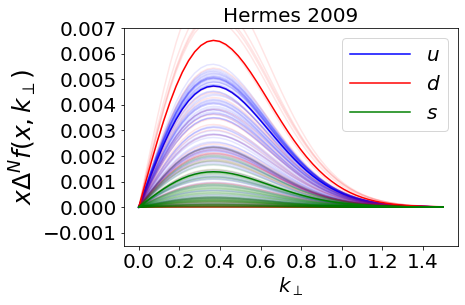

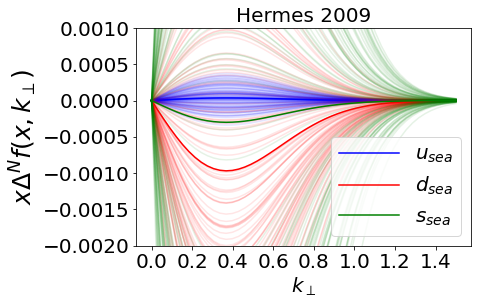

In [15]:
ff1=plt.figure(5)
plotSiversQBand(2,test_parm_1,'blue','$u$')
plotSiversQBand(1,test_parm_1,'red','$d$')
plotSiversQBand(3,test_parm_1,'green','$s$')
plt.legend(loc=1,fontsize=20,handlelength=3)
plt.title(filename,fontsize=20)
plt.xlabel('$k_{\perp}$',fontsize=20)
plt.ylabel('$x \Delta^N f(x,k_{\perp})$',fontsize=25)
plt.ylim([-0.0015,0.007])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=1,fontsize=20,handlelength=3)
ff1.savefig(filename+'QuarkSivers.pdf')


ff2=plt.figure(6)
plotSiversAntiQBand(-2,test_parm_1,'blue','$u_{sea}$')
plotSiversAntiQBand(-1,test_parm_1,'red','$d_{sea}$')
plotSiversAntiQBand(-3,test_parm_1,'green','$s_{sea}$')
plt.title(filename,fontsize=20)
plt.xlabel('$k_{\perp}$',fontsize=20)
plt.ylabel('$x \Delta^N f(x,k_{\perp})$',fontsize=25)
plt.ylim([-0.0020,0.001])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc=4,fontsize=20,handlelength=3)
ff2.savefig(filename+'AntiQuarkSivers.pdf')

<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))


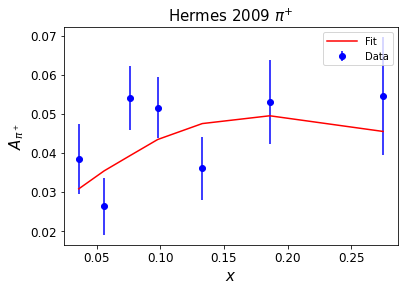

In [23]:
dep="x"
had="pi+"

f1=plt.figure(1)
plt.title(filename + " " + "$\pi^{+}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{\pi^+}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=1,fontsize=10,handlelength=3)
f1.savefig(filename+"PiPx.pdf")

<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))


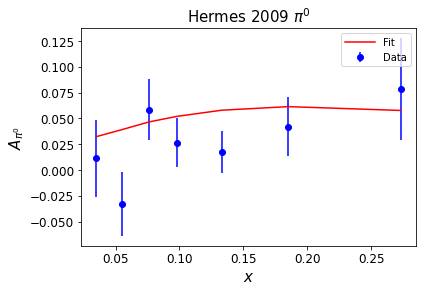

In [21]:
dep="x"
had="pi0"

f2=plt.figure(2)
plt.title(filename + " " + "$\pi^{0}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{\pi^0}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=1,fontsize=10,handlelength=3)
f2.savefig(filename+'Pi0x.pdf')

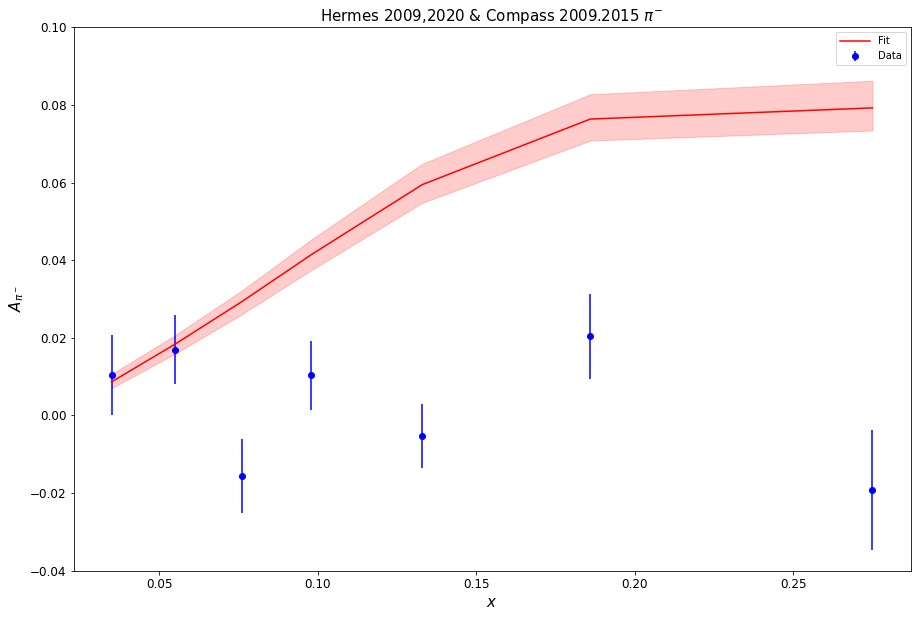

In [168]:
dep="x"
had="pi-"

f2=plt.figure(3,figsize=(15,10))
plt.title(filename + " " + "$\pi^{-}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{\pi^-}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([-0.04,0.10])
plt.legend(loc=1,fontsize=10,handlelength=3)
f2.savefig(filename+'PiMx.pdf')

<ipython-input-2-8d1756398172>:42: RuntimeWarning: overflow encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))
<ipython-input-2-8d1756398172>:42: RuntimeWarning: invalid value encountered in double_scalars
  tempNNq = Nq*(x**aaq)*((1-x)**(bbq))*((aaq+bbq)**(aaq+bbq))/((aaq**aaq)*(bbq**bbq))


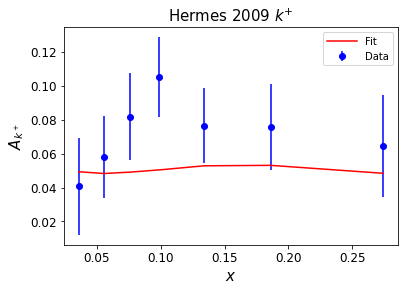

In [22]:
dep="x"
had="k+"

f3=plt.figure(4)
plt.title(filename + " " + "$k^{+}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{k^+}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=1,fontsize=10,handlelength=3)
f3.savefig(filename+'KPx.pdf')

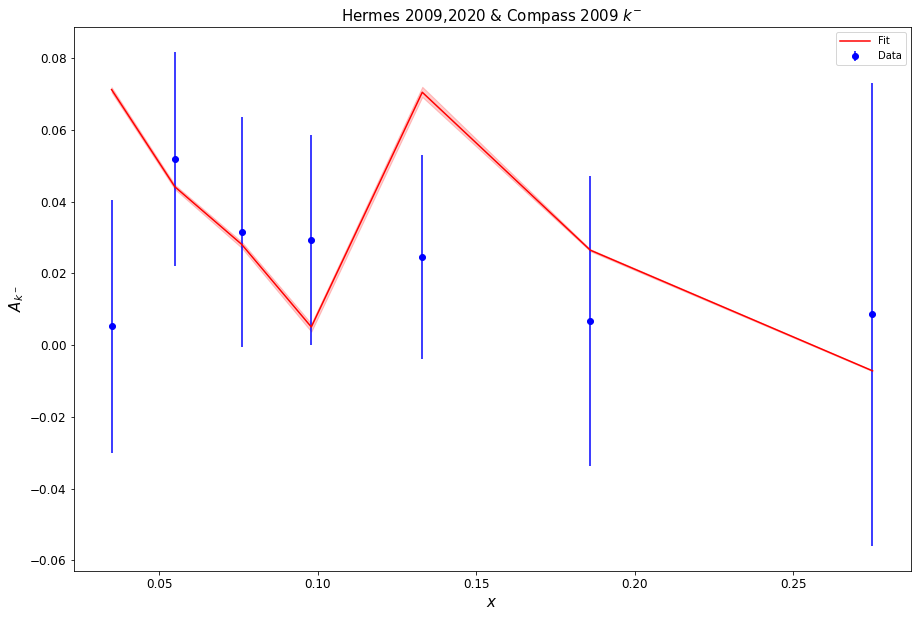

In [61]:
dep="x"
had="k-"

f4=plt.figure(5,figsize=(15,10))
plt.title(filename + " " + "$k^{-}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{k^-}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=1,fontsize=10,handlelength=3)
f4.savefig(filename+'KMx.pdf')

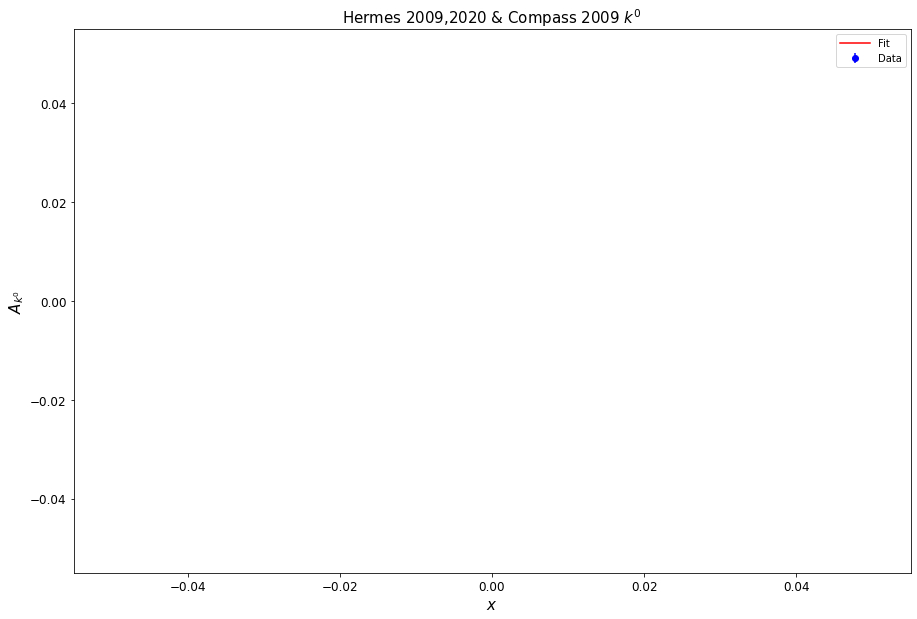

In [62]:
dep="x"
had="k0"

f4=plt.figure(6,figsize=(15,10))
plt.title(filename + " " + "$k^{0}$",fontsize=15)
PlotSivHadBand(DataFilesArray[0],had,dep,result,test_parms)
plt.xlabel('$x$',fontsize=15)
plt.ylabel('$A_{k^0}$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc=1,fontsize=10,handlelength=3)
f4.savefig(filename+'K0x.pdf')